In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])


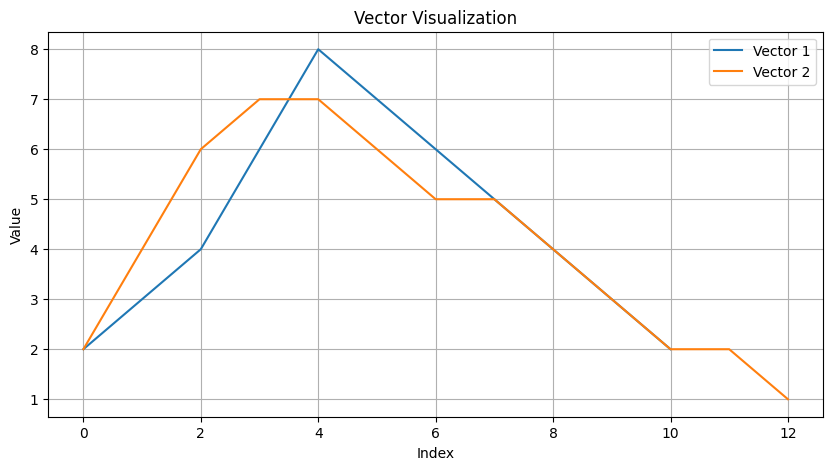

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(vector1, label='Vector 1')
plt.plot(vector2, label='Vector 2')
plt.title("Vector Visualization")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def dtw(v1, v2):
    len1, len2 = len(v1), len(v2)
    cost_matrix = np.full((len1 + 1, len2 + 1), np.inf)
    cost_matrix[0, 0] = 0

    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            cost = abs(v1[i - 1] - v2[j - 1])
            cost_matrix[i, j] = cost + min(cost_matrix[i - 1, j], 
                                           cost_matrix[i, j - 1], 
                                           cost_matrix[i - 1, j - 1])
    
    i, j = len1, len2
    path = []
    while i > 0 and j > 0:
        path.append((i - 1, j - 1))
        if cost_matrix[i - 1, j] == min(cost_matrix[i - 1, j], 
                                    cost_matrix[i, j - 1], 
                                    cost_matrix[i - 1, j - 1]):
            i -= 1
        elif cost_matrix[i, j - 1] == min(cost_matrix[i - 1, j], 
                                          cost_matrix[i, j - 1],
                                          cost_matrix[i - 1, j - 1]):
            j -= 1
        else:
            i -= 1
            j -= 1

    path.reverse()
    return cost_matrix[1:, 1:], path, cost_matrix[len1, len2]

In [8]:
cost_matrix, warping_path, dtw_distance = dtw(vector1, vector2)

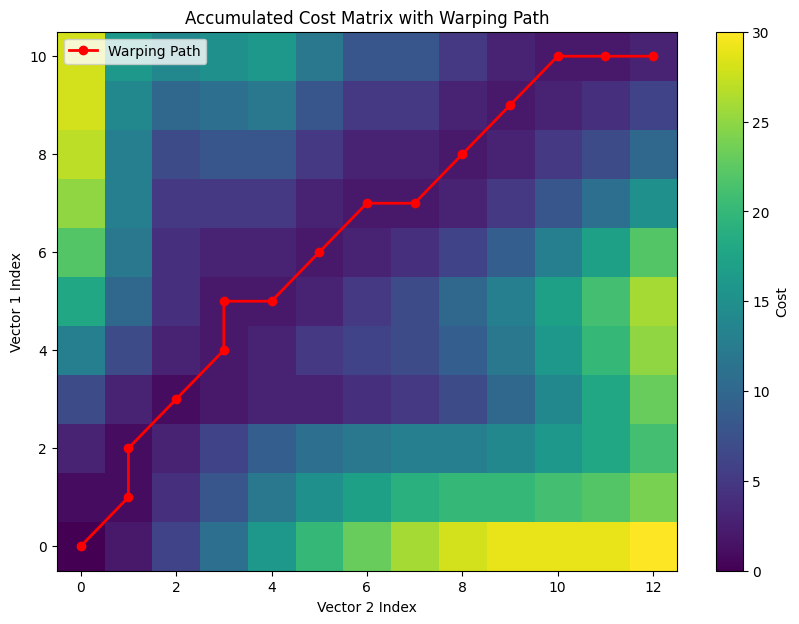

In [24]:
plt.figure(figsize=(10, 7))
plt.imshow(cost_matrix, origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Cost')
plt.title('Accumulated Cost Matrix with Warping Path')
plt.xlabel('Vector 2 Index')
plt.ylabel('Vector 1 Index')

# Plot the warping path directly
path_x, path_y = zip(*warping_path)
plt.plot(path_y, path_x, marker='o', color='red', label='Warping Path', linewidth=2)

# Add legend and grid
plt.legend()

# Display the plot
plt.show()


c:\Users\noelm\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Best solution found by GA: (array([-5.12,  5.12, -5.12,  5.12,  5.12]), -144.6235686289295, 0)
Stopping search: Swarm best objective change less than 1e-08


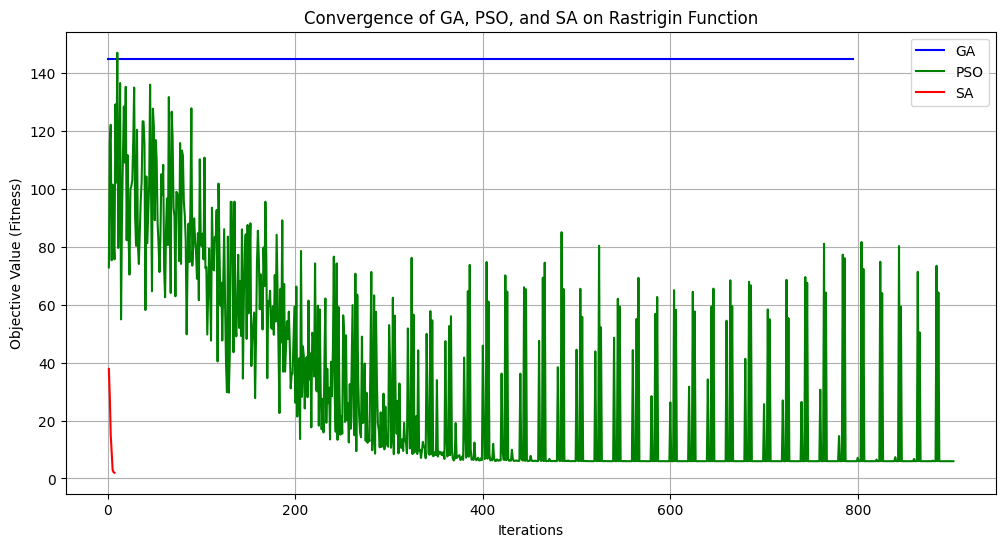

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pygad import GA
from pyswarm import pso
from scipy.optimize import dual_annealing

# Define the Rastrigin function
def rastrigin(x):
    return 10 * len(x) + sum([(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])

# Problem settings
dim = 5  # Number of dimensions
bounds = [(-5.12, 5.12)] * dim  # Search space

# 1. Genetic Algorithm (GA)
def ga_optimization():
    global fitness_values
    fitness_values = []

    # Updated fitness function to accept 3 parameters
    def fitness_function(ga_instance, solution, solution_index):
        value = -rastrigin(solution)  # Negate the function to maximize
        fitness_values.append(-value)  # Store the actual fitness
        return value

    ga_instance = GA(
        num_generations=50,
        num_parents_mating=5,
        fitness_func=fitness_function,  # Updated function
        sol_per_pop=20,
        num_genes=dim,
        gene_space=[(-5.12, 5.12)] * dim,  # Define the range for each gene
    )
    ga_instance.run()

    # Get the best solution's fitness value for comparison
    print("Best solution found by GA:", ga_instance.best_solution())
    return fitness_values

# 2. Particle Swarm Optimization (PSO)
def pso_optimization():
    history = []

    def cost_function(x):
        value = rastrigin(x)
        history.append(value)
        return value

    _, _ = pso(cost_function, lb=[-5.12] * dim, ub=[5.12] * dim, swarmsize=20, maxiter=50)
    return history

# 3. Simulated Annealing (SA)
def sa_optimization():
    history = []

    def callback(x, f, _):
        history.append(f)

    result = dual_annealing(rastrigin, bounds=bounds, maxiter=50, callback=callback)
    return history

# Run all algorithms
ga_results = ga_optimization()
pso_results = pso_optimization()
sa_results = sa_optimization()

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(ga_results, label="GA", color="blue")
plt.plot(range(1, len(pso_results) + 1), pso_results, label="PSO", color="green")
plt.plot(range(1, len(sa_results) + 1), sa_results, label="SA", color="red")
plt.xlabel("Iterations")
plt.ylabel("Objective Value (Fitness)")
plt.title("Convergence of GA, PSO, and SA on Rastrigin Function")
plt.legend()
plt.grid()
plt.show()


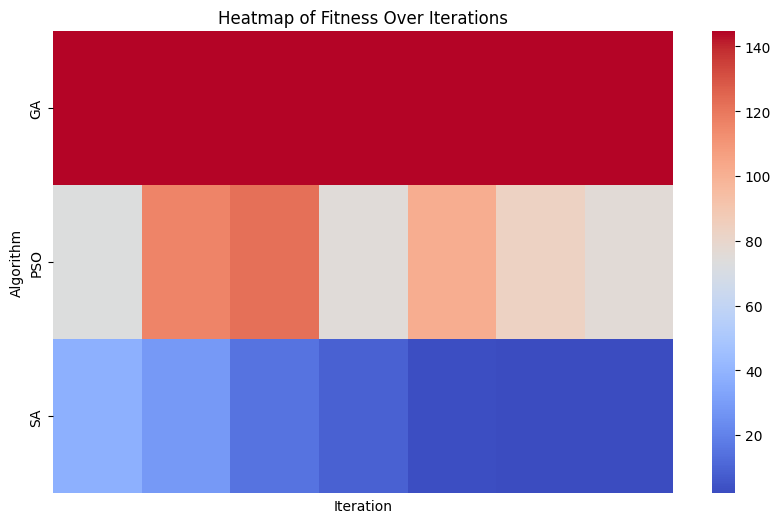

In [7]:
import numpy as np
import seaborn as sns

# Prepare data for heatmap
heatmap_data = np.array([
    ga_results[:min(len(ga_results), len(sa_results))],
    pso_results[:min(len(pso_results), len(sa_results))],
    sa_results[:min(len(ga_results), len(sa_results))]
])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar=True,
            xticklabels=False, yticklabels=["GA", "PSO", "SA"])
plt.title("Heatmap of Fitness Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Algorithm")
plt.show()


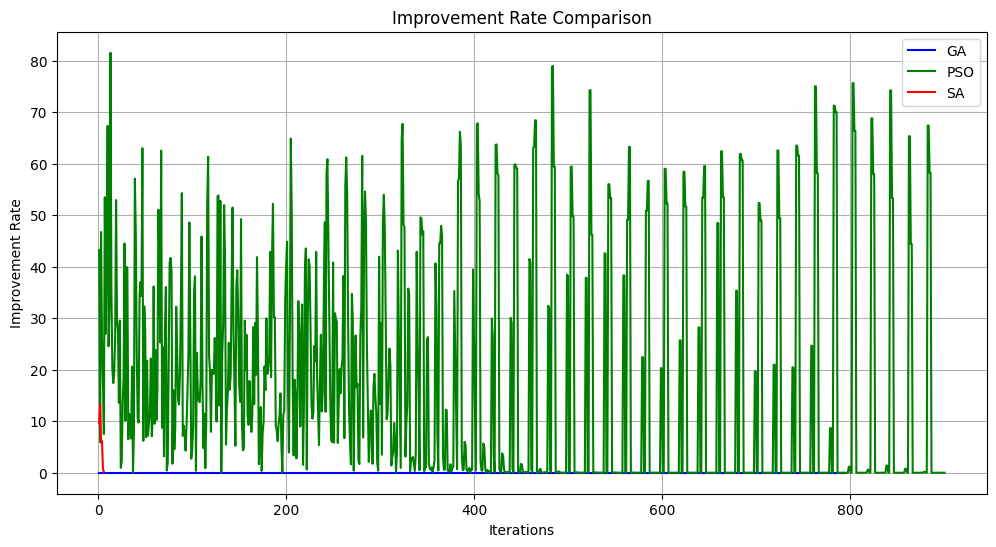

In [8]:
# Calculate improvement rates
def calculate_improvement_rate(results):
    return [abs(results[i] - results[i - 1]) for i in range(1, len(results))]

ga_rate = calculate_improvement_rate(ga_results)
pso_rate = calculate_improvement_rate(pso_results)
sa_rate = calculate_improvement_rate(sa_results)

# Plot improvement rates
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(ga_rate) + 1), ga_rate, label="GA", color="blue")
plt.plot(range(1, len(pso_rate) + 1), pso_rate, label="PSO", color="green")
plt.plot(range(1, len(sa_rate) + 1), sa_rate, label="SA", color="red")
plt.xlabel("Iterations")
plt.ylabel("Improvement Rate")
plt.title("Improvement Rate Comparison")
plt.legend()
plt.grid()
plt.show()


c:\Users\noelm\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Stopping search: Swarm best objective change less than 1e-08


TypeError: dual_annealing() got an unexpected keyword argument 'restart_temp'